In [1]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
files=[file for file in os.listdir(r'D:\Projet_data\data')]
for file in files:
    print(file)

all_data.csv
Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [3]:
path=r'D:\Projet_data\data'
#creer bd vide
all_data=pd.DataFrame()

for file in files:
    current_data=pd.read_csv(os.path.join(path, file))
    all_data=pd.concat([all_data,current_data])
print(all_data)

      Order ID                     Product Quantity Ordered Price Each  \
0       176558        USB-C Charging Cable                2      11.95   
1          NaN                         NaN              NaN        NaN   
2       176559  Bose SoundSport Headphones                1      99.99   
3       176560                Google Phone                1        600   
4       176560            Wired Headphones                1      11.99   
...        ...                         ...              ...        ...   
11681   259353      AAA Batteries (4-pack)                3       2.99   
11682   259354                      iPhone                1        700   
11683   259355                      iPhone                1        700   
11684   259356      34in Ultrawide Monitor                1     379.99   
11685   259357        USB-C Charging Cable                1      11.95   

           Order Date                         Purchase Address  
0      04/19/19 08:46             917 1st St, 

In [4]:
#rassembler les fichiers en un seul
all_data.to_csv(path+'/all_data.csv',index=False)

In [5]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [6]:
#suppr valeur NaN
all_data=all_data.dropna()

In [7]:
all_data.shape

(745220, 6)

In [8]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


# 1. Quel est le mois durant lequel nous avons réalisé le meilleur chiffre d'affaire

In [9]:
# extraire le mois
def month(x):
    return x.split('/')[0]
#exemple
month('12/01/19 14:34')

'12'

In [10]:
all_data['Month']=all_data['Order Date'].apply(month)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [11]:
all_data['Month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [12]:
all_data=all_data[all_data['Month']!='Order Date']
all_data['Month'].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

In [13]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [14]:
all_data["Month"]=all_data["Month"].astype(int)

In [15]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

In [16]:
all_data['Price Each']=all_data['Price Each'].astype(float)
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)

In [17]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [18]:
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']

In [19]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [20]:
all_data.groupby('Month')['Sales'].sum()

Month
1      7289026.92
2      8808089.68
3     11228401.52
4     13562680.96
5     12610427.00
6     10311209.04
7     10591103.04
8      8977871.52
9      8390240.52
10    14946907.52
11    12798412.80
12    18453773.36
Name: Sales, dtype: float64

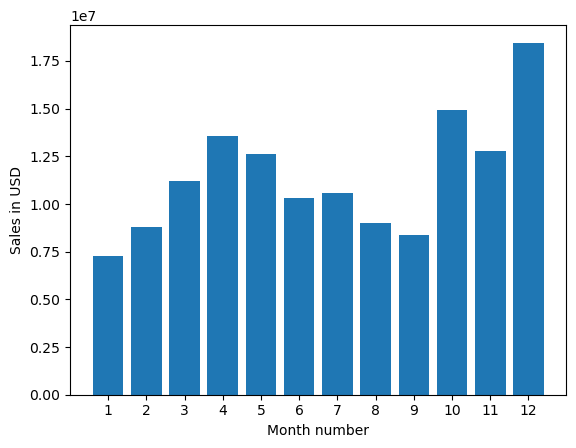

In [21]:
months=range(1,13)
plt.bar(months,all_data.groupby('Month')['Sales'].sum())
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Month number')
plt.show()

# 2. Quelle est la ville qui réalise le meilleur CA

In [22]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [25]:
# Récuperation de la ville

In [24]:
'917 1st St, Dallas, TX 75001'.split(',')[1]

' Dallas'

In [26]:
def city(x):
    return x.split(',')[1]

In [27]:
all_data['city']=all_data['Purchase Address'].apply(city)

In [28]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [31]:
all_data.groupby('city')['city'].count()

city
 Atlanta           59524
 Austin            39620
 Boston            79736
 Dallas            59280
 Los Angeles      118420
 New York City     99504
 Portland          49860
 San Francisco    178928
 Seattle           58928
Name: city, dtype: int64

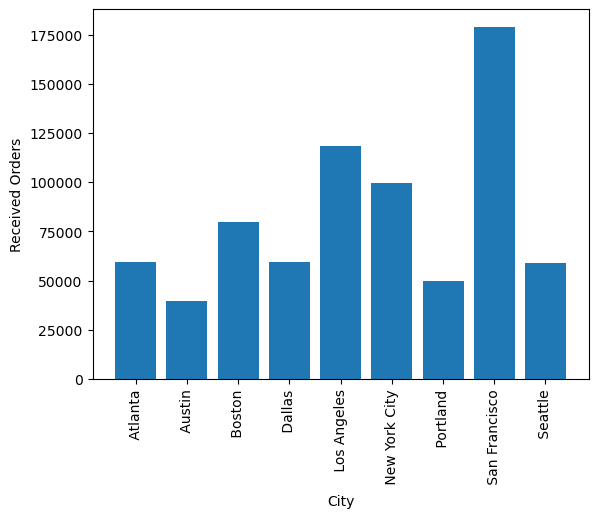

In [34]:
plt.bar(all_data.groupby('city')['city'].count().index,all_data.groupby('city')['city'].count())
plt.xticks(rotation='vertical')
plt.ylabel('Received Orders')
plt.xlabel('City')
plt.show()

# 3. Quand mener une campagne publicitaire (heure des commandes)

In [35]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [49]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date'], format="%m/%d/%y %H:%M").dt.hour

In [50]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


In [51]:
keys=[]
hours=[]
for key,hour in all_data.groupby('Hour'):
    keys.append(key)
    hours.append(len(hour))
hours

[15640,
 9400,
 4972,
 3324,
 3416,
 5284,
 9928,
 16044,
 25024,
 34992,
 43776,
 49644,
 50348,
 48516,
 43936,
 40700,
 41536,
 43596,
 49120,
 51620,
 48912,
 43684,
 35288,
 25100]

Text(0, 0.5, 'Nombre de commandes')

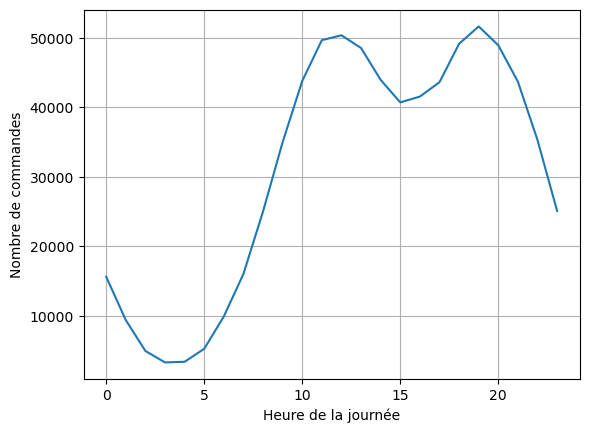

In [54]:
plt.grid()
plt.plot(keys,hours)
plt.xlabel('Heure de la journée')
plt.ylabel('Nombre de commandes')

 # 4. Quel produit se vend le plus ?

<Axes: xlabel='Product'>

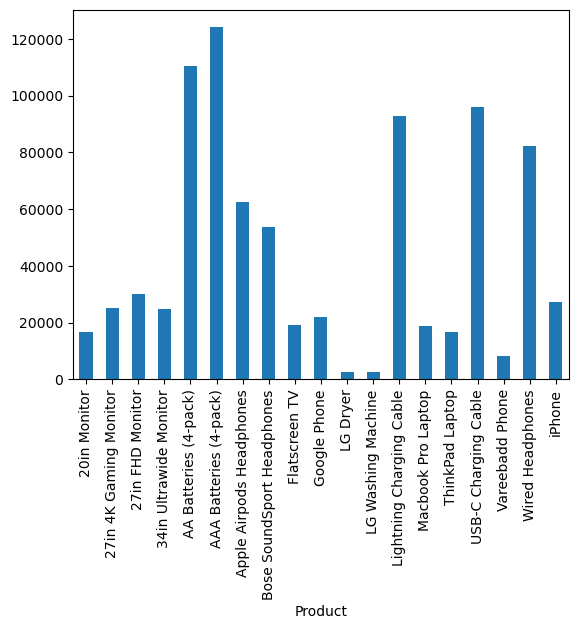

In [55]:
all_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

In [56]:
all_data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [57]:
products=all_data.groupby('Product')['Quantity Ordered'].sum().index
quantity=all_data.groupby('Product')['Quantity Ordered'].sum()
prices=all_data.groupby('Product')['Price Each'].mean()

C:\Users\coque\AppData\Local\Temp\ipykernel_21140\3485988270.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products,rotation='vertical', size=8)


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

<Figure size 4000x2400 with 0 Axes>

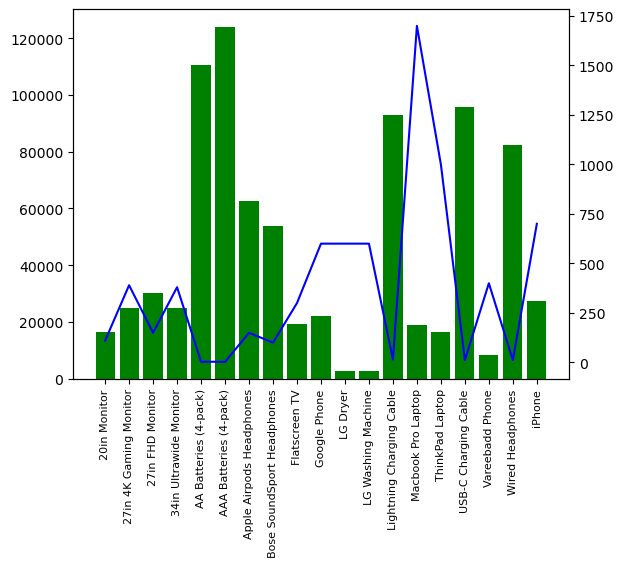

In [59]:
plt.figure(figsize=(40,24))
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(products,quantity,color='g')
ax2.plot(products,prices,'b-')
ax1.set_xticklabels(products,rotation='vertical', size=8)

# 5. Quelles sont les combinaisons de produits qui se vendent le plus ?

In [99]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,7
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,17


In [100]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

In [101]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,Hour,Grouped
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,"USB-C Charging Cable,USB-C Charging Cable,USB-..."
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,"Bose SoundSport Headphones,Bose SoundSport Hea..."
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones,Google Phone,Wir..."
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,"Google Phone,Wired Headphones,Google Phone,Wir..."
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,"Wired Headphones,Wired Headphones,Wired Headph..."
...,...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20,"AAA Batteries (4-pack),AAA Batteries (4-pack),..."
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16,"iPhone,iPhone,iPhone,iPhone"
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,7,"iPhone,iPhone,iPhone,iPhone"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,17,"34in Ultrawide Monitor,34in Ultrawide Monitor,..."


In [102]:
df = df[['Order ID', 'Grouped']].drop_duplicates()
df

,Order ID,Grouped
0,176558,"USB-C Charging Cable,USB-C Charging Cable,USB-..."
2,176559,"Bose SoundSport Headphones,Bose SoundSport Hea..."
3,176560,"Google Phone,Wired Headphones,Google Phone,Wir..."
5,176561,"Wired Headphones,Wired Headphones,Wired Headph..."
6,176562,"USB-C Charging Cable,USB-C Charging Cable,USB-..."
...,...,...
186845,259353,"AAA Batteries (4-pack),AAA Batteries (4-pack),..."
186846,259354,"iPhone,iPhone,iPhone,iPhone"
186847,259355,"iPhone,iPhone,iPhone,iPhone"
186848,259356,"34in Ultrawide Monitor,34in Ultrawide Monitor,..."


In [103]:
product_combinaison=df['Grouped'].value_counts()
product_combinaison

Grouped
Lightning Charging Cable,Lightning Charging Cable,Lightning Charging Cable,Lightning Charging Cable                                                                                                                                            19831
AAA Batteries (4-pack),AAA Batteries (4-pack),AAA Batteries (4-pack),AAA Batteries (4-pack)                                                                                                                                                    19826
AA Batteries (4-pack),AA Batteries (4-pack),AA Batteries (4-pack),AA Batteries (4-pack)                                                                                                                                                        19809
USB-C Charging Cable,USB-C Charging Cable,USB-C Charging Cable,USB-C Charging Cable                                                                                                                                                            19792
Wired Headph

# Diagrammes circulaires des combinaisons de produits les + achetés ensembles

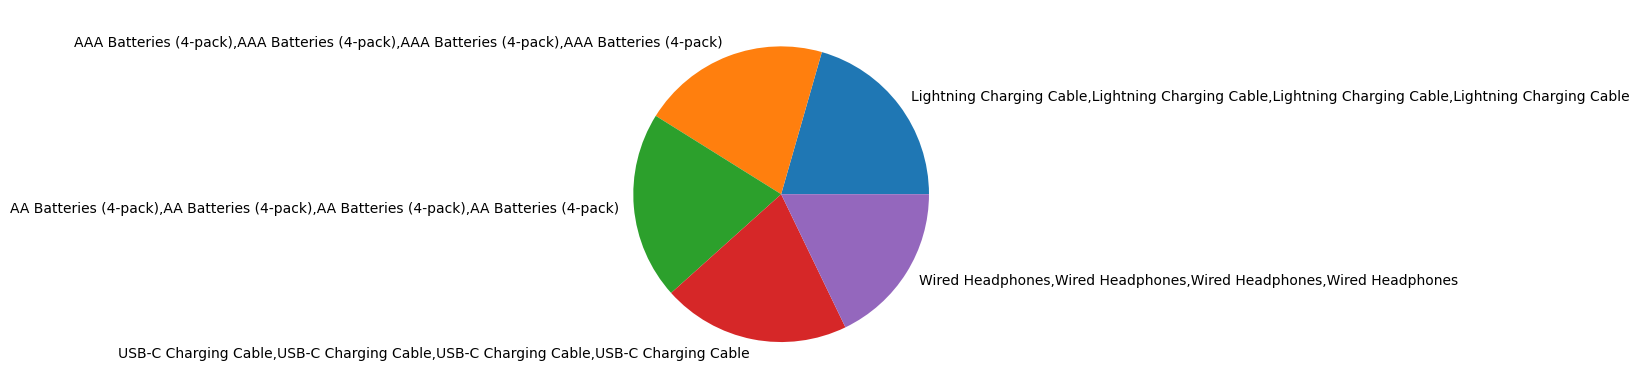

In [104]:
product_combinations.head(5).plot.pie()
plt.ylabel('') 
plt.show()